In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset
df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')

# Display first few rows
print(df.head())

# Features and target
X = df.drop('MEDV', axis=1)  # 'medv' is the target variable (median value of owner-occupied homes)
y = df['MEDV']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


/kaggle/input/bostonhoustingmlnd/housing.csv
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
Mean Squared Error: 6789025559.27
R² Score: 0.69


# plots and Visualization

Confusion Matrix:
 [[98]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:97: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


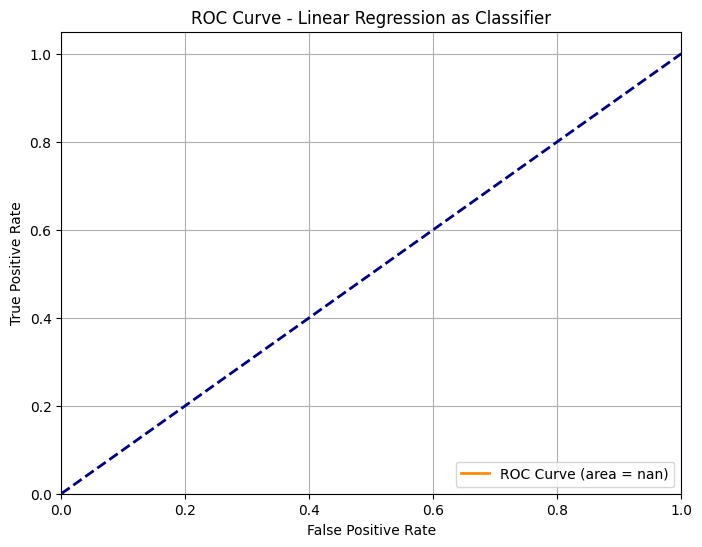

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Binarize actual and predicted values
y_test_binary = (y_test >= 30).astype(int)
y_pred_binary = (y_pred >= 30).astype(int)

# Step 2: Confusion Matrix
conf_mat = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", conf_mat)

# Step 3: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear Regression as Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**All 6 models of regression**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:97: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:97: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:97: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
/usr


Ridge Regression
MSE: 6787779698.38
R² Score: 0.69
Confusion Matrix:
[[98]]
AUC Score: nan

Lasso Regression
MSE: 6789025426.57
R² Score: 0.69
Confusion Matrix:
[[98]]
AUC Score: nan

ElasticNet Regression
MSE: 6796792513.65
R² Score: 0.69
Confusion Matrix:
[[98]]
AUC Score: nan

Decision Tree Regression
MSE: 3858735286.46
R² Score: 0.82
Confusion Matrix:
[[98]]
AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:97: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:97: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):



Random Forest Regression
MSE: 3245169433.50
R² Score: 0.85
Confusion Matrix:
[[98]]
AUC Score: nan

Support Vector Regression
MSE: 21145705281.39
R² Score: 0.04
Confusion Matrix:
[[98]]
AUC Score: nan


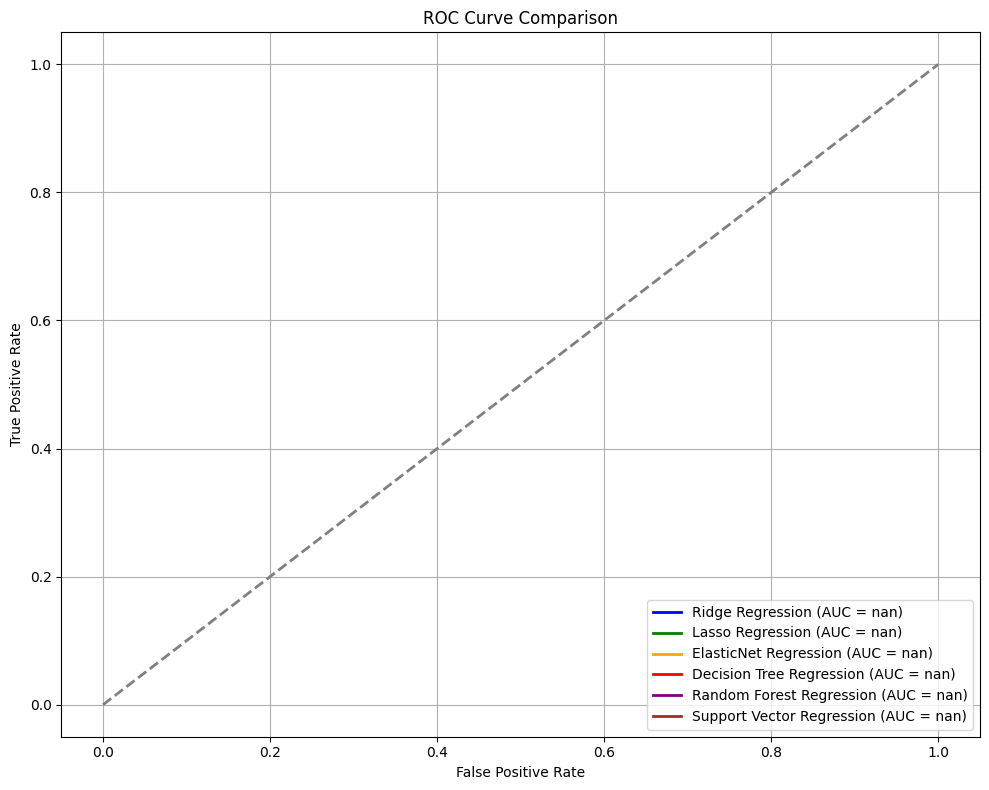

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, auc

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the dataset
df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')

# Prepare data
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_binary = (y_test >= 30).astype(int)  # Classification for ROC & Conf Matrix

# Define models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=100, epsilon=0.1)
}

# Plot setup
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

# Train and evaluate each model
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Regression Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Binarize predictions
    y_pred_binary = (y_pred >= 30).astype(int)
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
    roc_auc = auc(fpr, tpr)

    # Print Metrics
    print(f"\n{'='*40}")
    print(f"{name}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"AUC Score: {roc_auc:.2f}")

    # Plot ROC
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Final ROC Plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
